# ml_testing

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [2]:
corpus = pd.read_csv("../corpora/german_modern_poems.csv")

In [17]:
def random_downsampling(corpus, class_column = "epoch"):
    classes = corpus[class_column].unique()
    #for cls in classes:    

In [20]:
l = ['Expressionismus_Dadaismus', 'Jahrhundertwende', 'Naturalismus']

In [31]:
corpus_1 = corpus[corpus.epoch == 'Expressionismus_Dadaismus']
corpus_2 = corpus[corpus.epoch == 'Jahrhundertwende']
corpus_3 = corpus[corpus.epoch == 'Naturalismus']

corpus_2 = corpus_2.sample(2000)

ncorpus = pd.concat([corpus_1, corpus_2, corpus_3], axis=0)

In [33]:
corpus_3.poet.value_counts()

Bierbaum, Otto Julius           469
Müller-Jahnke, Clara            225
Falke, Gustav                   188
Meyer, Conrad Ferdinand         148
Hartleben, Otto Erich           135
Holz, Arno                      125
Liliencron, Detlev von           96
Scheerbart, Paul                 58
Fontane, Theodor                 48
Keller, Gottfried                17
Nietzsche, Friedrich              9
Dahn, Felix                       6
Hofmannsthal, Hugo von            1
Lenz, Jakob Michael Reinhold      1
Heyse, Paul                       1
Storm, Theodor                    1
Name: poet, dtype: int64

In [18]:
random_downsampling(corpus)

['Expressionismus_Dadaismus' 'Jahrhundertwende' 'Naturalismus']


In [19]:
corpus.sample()

,pid,filename,poet,title,year,poem,poemlength,epoch
768,45417,"Rilke, Rainer Maria_Pont du Carrousel_1900","Rilke, Rainer Maria",Pont du Carrousel,1900,"Der blinde Mann, der auf der Brücke steht, gra...",72,Jahrhundertwende


In [2]:
corpus = pd.read_csv("../corpora/german_modern_poems.csv")

In [14]:
corpus.epoch.value_counts()

Jahrhundertwende             5371
Naturalismus                 1528
Expressionismus_Dadaismus     943
Name: epoch, dtype: int64

In [3]:
labels = corpus["epoch"]
vector  = TfidfVectorizer().fit_transform(corpus["poem"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [6]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
    
    return y_pred

In [7]:
y_pred = classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.731.

Der F1-score für die Klassifizierung mit SVM ist 0.743.


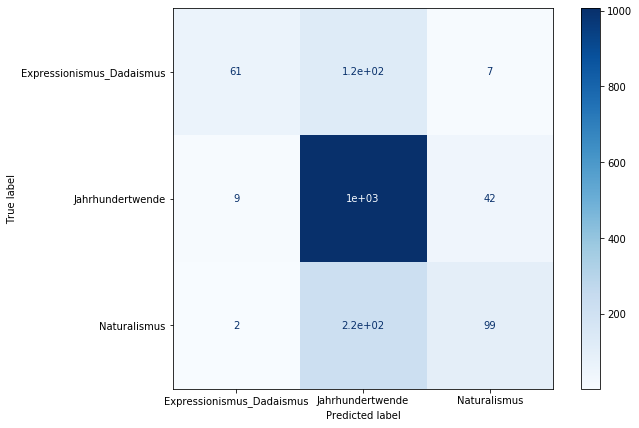

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

svm_classifier = LinearSVC(C=1.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
classes = corpus["epoch"].drop_duplicates().tolist()
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
   
fig, ax = plt.subplots(figsize = (10, 7))
plot_confusion_matrix(svm_classifier, 
                      X_test, 
                      y_test,
                      display_labels=classes,
                      cmap=plt.cm.Blues,
                      ax = ax)
plt.show()